In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
data=pd.read_csv(path+"\\data\\data.csv")

In [3]:
data.columns

Index(['Type', 'Name', 'Breed1', 'Gender', 'Color1', 'Color2', 'Color3',
       'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized',
       'Health', 'Fee', 'VideoAmt', 'PhotoAmt', 'AdoptionSpeed', 'newAge',
       'state_gdp', 'state_population', 'TSVD_0', 'TSVD_1', 'TSVD_2', 'TSVD_3',
       'TSVD_4', 'TSVD_5', 'TSVD_6', 'TSVD_7', 'TSVD_8', 'TSVD_9', 'TSVD_10',
       'TSVD_11', 'TSVD_12', 'TSVD_13', 'TSVD_14', 'TSVD_15', 'TSVD_16',
       'TSVD_17', 'TSVD_18', 'TSVD_19', 'TSVD_20', 'TSVD_21', 'TSVD_22',
       'TSVD_23', 'TSVD_24', 'TSVD_25', 'TSVD_26', 'TSVD_27', 'TSVD_28',
       'TSVD_29', 'TSVD_30', 'TSVD_31', 'TSVD_32', 'TSVD_33', 'TSVD_34',
       'TSVD_35', 'TSVD_36', 'TSVD_37', 'TSVD_38', 'TSVD_39', 'TSVD_40',
       'TSVD_41', 'TSVD_42', 'TSVD_43', 'TSVD_44', 'TSVD_45', 'TSVD_46',
       'TSVD_47', 'TSVD_48', 'TSVD_49', '95481e953f8aed9ec3d16fc4509537e8',
       'aa66486163b6cbc25ea62a34b11c9b91', 'b53c34474d9e24574bcec6a3d3306a0d',
       'b770bac0ca797cf14

In [4]:
y = data['AdoptionSpeed']
data.drop('AdoptionSpeed',axis=1,inplace=True)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.25, random_state=42)

In [6]:
X_train.shape

(11244, 78)

In [7]:
X_test.shape

(3749, 78)

In [8]:
y_train.shape

(11244,)

In [9]:
y_test.shape

(3749,)

## RandomForest

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [43]:
n_estimators = [30, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 800, 900, 1000]

In [44]:
train_scores = []
test_scores = []
predictions = []
feature_importances = []

In [45]:
for n in n_estimators:
    clf = RandomForestClassifier(n_estimators=n)
    clf.fit(X_train, y_train)
    # feature_importances
    feature_importances.append(clf.feature_importances_)
    # traning data score
    prediction = clf.predict(X_test)
    predictions.append(prediction)
    test_scores.append(accuracy_score(y_test, prediction))
    # test data score
    score = clf.score(X_train, y_train)
    train_scores.append(score)

In [46]:
train_scores

[0.9982212735681252,
 0.998310209889719,
 0.9983991462113126,
 0.9983991462113126,
 0.9983991462113126,
 0.9983991462113126,
 0.9983991462113126,
 0.9983991462113126,
 0.9983991462113126,
 0.9983991462113126,
 0.9983991462113126,
 0.9983991462113126,
 0.9983991462113126,
 0.9983991462113126,
 0.9983991462113126,
 0.9983991462113126,
 0.9983991462113126,
 0.9983991462113126]

In [47]:
test_scores

[0.40090690850893573,
 0.4382502000533476,
 0.4382502000533476,
 0.44785276073619634,
 0.4462523339557215,
 0.44358495598826353,
 0.45638837023206186,
 0.4601226993865031,
 0.4585222726060283,
 0.4529207788743665,
 0.45612163243531606,
 0.4579887970125367,
 0.4531875166711123,
 0.4571885836222993,
 0.4547879434515871,
 0.4537209922646039,
 0.4577220592157909,
 0.4547879434515871]

In [48]:
import scipy.interpolate as interpolate

In [54]:
xnew = np.arange(30, 1000, 5)
func = interpolate.interp1d(n_estimators, test_scores, kind='cubic')
ynew = func(xnew)

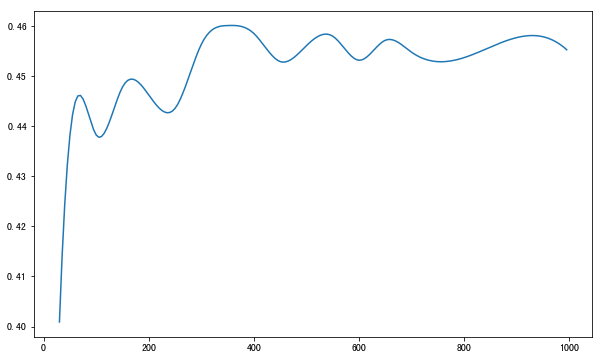

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 6)
plt.plot(xnew, ynew)
plt.show()

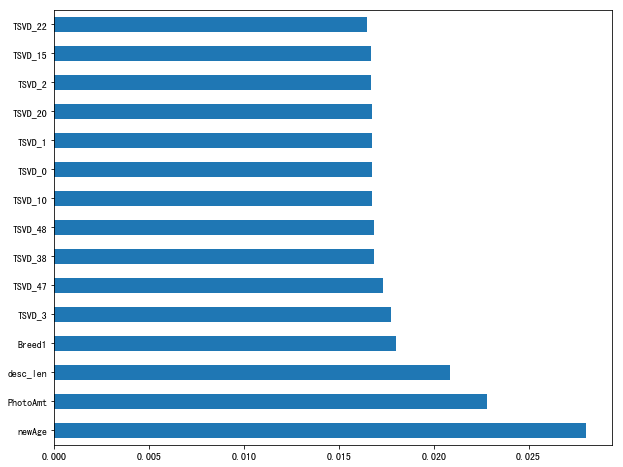

In [62]:
### choose highest score tree to plot feature importance
plt.rcParams["figure.figsize"] = (10, 8)
feat_importances = pd.Series(feature_importances[7], index=data.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [67]:
RF_prediction = pd.Series(predictions[7])
RF_prediction.to_csv(path+'\\result\\RF_prediction.csv', index=False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
